#Part 3: Denoising AutoEncoder

In [ ]:
#Inject noise into testing data
noise_factor = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

#Reshape data to comply with input of denoising autoencoder
data_train = data_train.reshape(-1,28, 28, 1)
data_test = data_test.reshape(-1, 28, 28, 1)
data_train_noisy = data_train_noisy.reshape(-1, 28, 28, 1)
data_test_noisy = data_test_noisy.reshape(-1, 28, 28, 1)

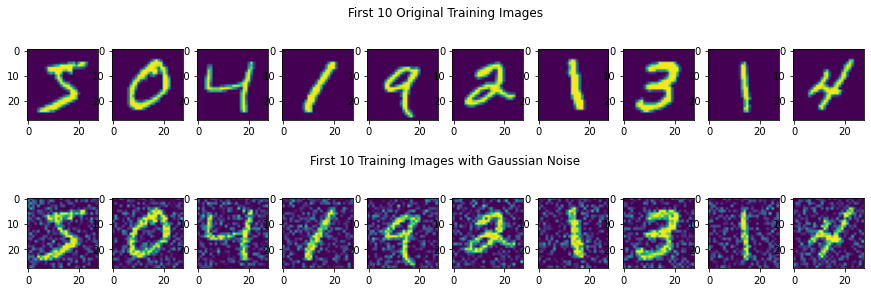

In [ ]:
#Show samples of 10 original images and their corrsponding noisy counterparts from the training set
fig, axes = plt.subplots(2, 10, figsize=(15, 5))
grid = plt.GridSpec(2, 1)
subtitles = ['First 10 Original Training Images',
             'First 10 Training Images with Gaussian Noise']

for i in range(2):
  row = fig.add_subplot(grid[i])
  row.set_title(subtitles[i])
  row.set_axis_off()

for i in range(10):
  axes[0][i].imshow(data_train[i].reshape(28, 28))
  axes[1][i].imshow(data_train_noisy[i].reshape(28, 28))

In [ ]:
import keras.models as models
import keras.layers as layers
import tensorflow as tf

# Model Settings
batch_size = 100

#Create denoising autoencoder architecture
def dae():

    model = models.Sequential()
    model.add(layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(layers.MaxPool2D(pool_size=(2, 2), padding='same'))
    model.add(layers.Conv2D(16, kernel_size=3, activation='relu', padding='same'))

    # 'Bottleneck' layer
    model.add(layers.MaxPool2D(pool_size=(2, 2), padding='same'))  

    model.add(layers.Conv2D(16, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(1, kernel_size=3, activation='sigmoid', padding='same'))

    return model
  
dae_model = dae()
  
#Compile and train the DAE
dae_model.compile(loss=tf.losses.BinaryCrossentropy(), optimizer=tf.optimizers.Adam(learning_rate=1e-3))
dae_metadata = dae_model.fit(data_train_noisy, data_train,
                             validation_data=(data_test_noisy, data_test),
                             epochs=150,
                             batch_size=batch_size,
                             shuffle=True)

#Generate denoised versions of noisy inputs
regenrations = dae_model.predict(data_test_noisy)


Epoch 1/150
600/600 [==============================] - 4s 5ms/step - loss: 0.1397 - val_loss: 0.0927
Epoch 2/150
600/600 [==============================] - 3s 5ms/step - loss: 0.0892 - val_loss: 0.0853
Epoch 3/150
600/600 [==============================] - 3s 5ms/step - loss: 0.0843 - val_loss: 0.0822
Epoch 4/150
600/600 [==============================] - 3s 5ms/step - loss: 0.0821 - val_loss: 0.0805
Epoch 5/150
600/600 [==============================] - 3s 5ms/step - loss: 0.0808 - val_loss: 0.0798
Epoch 6/150
600/600 [==============================] - 3s 5ms/step - loss: 0.0799 - val_loss: 0.0790
Epoch 7/150
600/600 [==============================] - 3s 5ms/step - loss: 0.0793 - val_loss: 0.0782
Epoch 8/150
600/600 [==============================] - 3s 5ms/step - loss: 0.0788 - val_loss: 0.0780
Epoch 9/150
600/600 [==============================] - 3s 5ms/step - loss: 0.0784 - val_loss: 0.0780
Epoch 10/150
600/600 [==============================] - 3s 5ms/step - loss: 0.0780 - val_lo

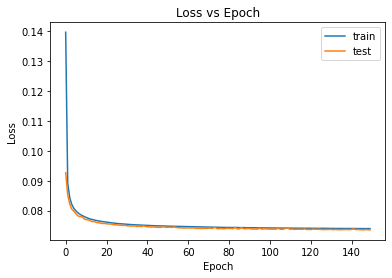

In [ ]:
#Plot loss vs epoch
plt.plot(dae_metadata.history['loss'])
plt.plot(dae_metadata.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


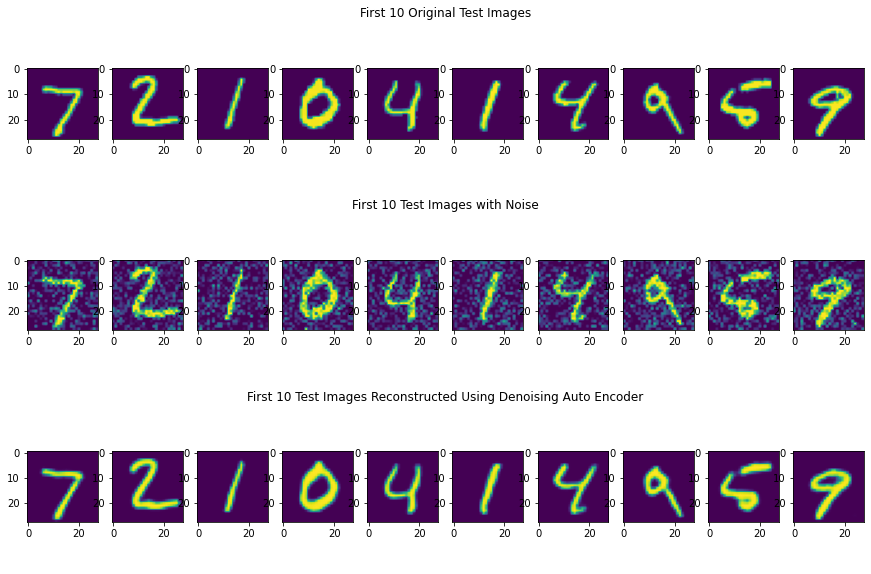

In [ ]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 10, figsize=(15, 10))
grids = plt.GridSpec(3, 1)
subtitles = ['First 10 Original Test Images',
             'First 10 Test Images with Noise',
             'First 10 Test Images Reconstructed Using Denoising Auto Encoder']

for i in range(3):
  row = fig.add_subplot(grids[i])
  row.set_title(subtitles[i])
  row.set_axis_off()

for i in range(10):
  axes[0][i].imshow(data_test[i].reshape(28, 28))
  axes[1][i].imshow(data_test_noisy[i].reshape(28, 28))
  axes[2][i].imshow(regenrations[i].reshape(28, 28))